In [1]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, GRU, Attention

# Load data from JSON file
with open("data.json") as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data["o"], data["h"], data["l"], data["c"], data["v"]))
y = np.array(data["l"])

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape data for LSTM input (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.7, random_state=42
)

# Build the model
model = Sequential()
model.add(
    Bidirectional(
        GRU(
            units=128,
            return_sequences=True,
            input_shape=(X_scaled.shape[1], X_scaled.shape[2]),
        )
    )
)
model.add(Dropout(0.2))
model.add(
    Bidirectional(
        GRU(units=128),
    )
)
model.add(Dropout(0.2)),
model.add(Dense(32, kernel_initializer="uniform", activation="relu"))
model.add(Dense(1, kernel_initializer="uniform", activation="linear"))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model using train data
model.fit(X_train, y_train, epochs=100, batch_size=2048, verbose=1)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", loss)

# Predict tomorrow's value
last_data_point = X_scaled[-1].reshape(1, X_scaled.shape[1], 1)
predicted_values = []

2024-05-07 23:52:02.705133: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-07 23:52:02.705181: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-07 23:52:02.705195: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-07 23:52:02.705338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-07 23:52:02.705442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-05-07 23:52:08.790904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step - loss: 0.2052
Epoch 2/100
1/1 [==============================] - 0s 180ms/step - loss: 0.1972
Epoch 3/100
1/1 [==============================] - 0s 161ms/step - loss: 0.1893
Epoch 4/100
1/1 [==============================] - 0s 89ms/step - loss: 0.1802
Epoch 5/100
1/1 [==============================] - 0s 325ms/step - loss: 0.1693
Epoch 6/100
1/1 [==============================] - 0s 495ms/step - loss: 0.1559
Epoch 7/100
1/1 [==============================] - 0s 88ms/step - loss: 0.1390
Epoch 8/100
1/1 [==============================] - 0s 205ms/step - loss: 0.1183
Epoch 9/100
1/1 [==============================] - 0s 201ms/step - loss: 0.0938
Epoch 10/100
1/1 [==============================] - 0s 99ms/step - loss: 0.0661
Epoch 11/100
1/1 [==============================] - 0s 143ms/step - loss: 0.0373
Epoch 12/100
1/1 [==============================] - 0s 241ms/step - loss: 0.0137
Epoch 13/100
1/1 [==============================] - 0s 

In [2]:
for _ in range(365):
    # Predict next day's value
    predicted_value_scaled = model.predict(last_data_point)
    predicted_value = scaler_y.inverse_transform(predicted_value_scaled)
    predicted_values.append(predicted_value.flatten()[0])

    # Append the predicted value to the end of the data
    last_data_point = np.concatenate(
        [last_data_point[:, 1:], predicted_value_scaled.reshape(1, 1, 1)], axis=1
    )

print("Predicted Close Prices for Next 7 Days:", predicted_values)

1/1 [==============================] - 0s 36ms/step
Predicted Close Prices for Next 7 Days: [1244.6205, 1226.5905, 1212.9167, 1203.5765, 1199.3228, 1318.6248, 1327.576, 1344.8585, 1369.6553, 1401.2407, 1438.3762, 1458.8058, 1481.8969, 1506.0428, 1529.7739, 1551.7194, 1570.744, 1589.505, 1607.389, 1624.05, 1639.3865, 1653.5298, 1666.804, 1679.106, 1690.4352, 1700.8528, 1710.4431, 1719.2764, 1727.3773, 1734.7938, 1741.5792, 1747.7842, 1753.4525, 1758.6226, 1763.3342, 1767.626, 1771.5326, 1775.0857, 1778.3154, 1781.2498, 1783.914, 1786.3325, 1788.5267, 1790.517, 1792.3212, 1793.9564, 1795.4382, 1796.7805, 1797.9965, 1799.0972, 1800.0936, 1800.9956, 1801.8124, 1802.5511, 1803.2195, 1803.8242, 1804.3712, 1804.8661, 1805.3137, 1805.7183, 1806.0844, 1806.4153, 1806.7146, 1806.9852, 1807.2297, 1807.4508, 1807.6508, 1807.8314, 1807.9949, 1808.1427, 1808.2762, 1808.3969, 1808.5059, 1808.6044, 1808.6936, 1808.774, 1808.8468, 1808.9127, 1808.9722, 1809.0258, 1809.0743, 1809.1184, 1809.158, 1809.19

In [3]:
# Convert predicted values to original scale
predicted_values_original = scaler_y.inverse_transform(predicted_value_scaled).flatten()

# Convert actual values to original scale
actual_values_original = scaler_y.inverse_transform(y_test).flatten()

# Calculate the absolute percentage error
absolute_percentage_error = (
    np.abs(predicted_values_original - actual_values_original) / actual_values_original
)

# Define a threshold for considering a prediction as correct
threshold = 0.5  # For example, considering predictions within 5% of the actual value as correct

# Count correct and incorrect predictions
correct_predictions = np.sum(absolute_percentage_error <= threshold)
incorrect_predictions = np.sum(absolute_percentage_error > threshold)

# Calculate accuracy
total_predictions = len(absolute_percentage_error)
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 0.0662202380952381


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on test data
predictions_scaled = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_inverse = scaler_y.inverse_transform(y_test)

# Calculate RMSE
rmse = mean_squared_error(y_test_inverse, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions)
print("Mean Absolute Error (MAE):", mae)

126/126 [==============================] - 2s 11ms/step
Root Mean Squared Error (RMSE): 21.643626784938444
Mean Absolute Error (MAE): 13.505042555067272


In [5]:
# model.save("vni.h5")

In [6]:
# from tensorflow.keras.models import load_model

# model = load_model("vni.h5")

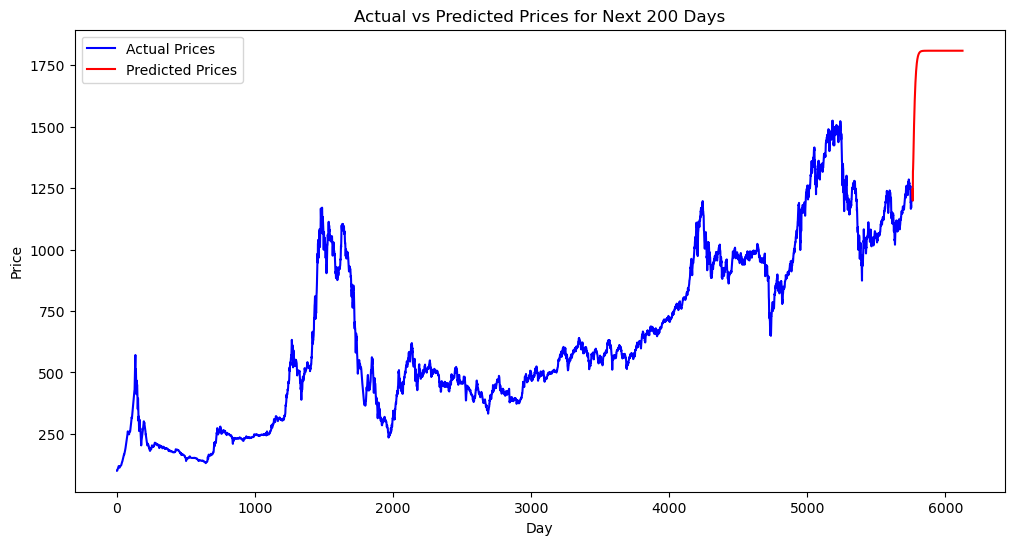

In [7]:
# Vẽ biểu đồ
from matplotlib import pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(y, label="Actual Prices", color="blue")
plt.plot(
    np.arange(len(X_scaled), len(X_scaled) + 365),
    predicted_values,
    label="Predicted Prices",
    color="red",
)
plt.title("Actual vs Predicted Prices for Next 200 Days")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()